In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf
print(tf.__version__)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # disabling verbose tf logging

2023-12-17 14:08:16.390645: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-17 14:08:16.392265: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 14:08:16.420985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 14:08:16.421007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 14:08:16.421727: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

2.15.0


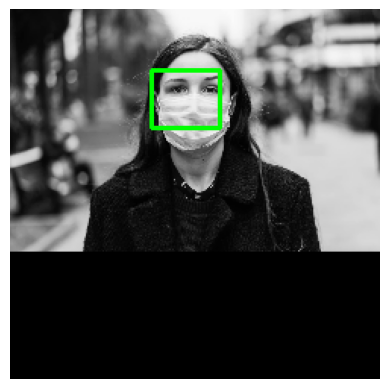

In [2]:
input_size = 244

def format_image(img):
    height, width = img.shape
    max_size = max(height, width)
    r = max_size / input_size
    new_width = int(width / r)
    new_height = int(height / r)
    new_size = (new_width, new_height)
    resized = cv.resize(img, new_size, interpolation= cv.INTER_LINEAR)
    new_image = np.zeros((input_size, input_size), dtype=np.uint8)
    new_image[0:new_height, 0:new_width] = resized

    # x, y, w, h = box[0], box[1], box[2], box[3]
    # new_box = [int((x - 0.5*w)* width / r), int((y - 0.5*h) * height / r), int(w*width / r), int(h*height / r)]

    return new_image


temp_img = cv.imread("tmp/106467352-1585602933667virus-medical-flu-mask-health-protection-woman-young-outdoor-sick-pollution-protective-danger-face_t20_o07dbe.jpg", cv.IMREAD_GRAYSCALE)
box = [93, 40, 46, 39]

temp_img_formated = format_image(temp_img)

temp_color_img = cv.cvtColor(temp_img_formated, cv.COLOR_GRAY2RGB)

cv.rectangle(temp_color_img, box, (0, 255, 0), 2)

plt.imshow(temp_color_img)
plt.axis("off")
plt.show()